<a href="https://colab.research.google.com/github/MoizAhmed2517/Satellite-Image-Semantic-Segmentation/blob/main/Satellite_Remote_Sensing_images_Semantic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setting Drive settings

In [ ]:
!pip install patchify

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd drive/MyDrive/ColabNotebooks

/content/drive/MyDrive/ColabNotebooks


### Setup datapath

In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify, unpatchify
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
folder = 'satellite_imagery_data'
images = []
for path, dir, files in os.walk(folder):
  for file in files:
    if file.lower().endswith('.png'):
      images.append(os.path.join(path, file))

In [ ]:
mask_data = []
# Cropping technique
image = cv2.imread(images[5], 1)
print("Original Image Shape:", image.shape)
image_patch_size = 256

size_x = (image.shape[1] // image_patch_size) * image_patch_size
size_y = (image.shape[0] // image_patch_size) * image_patch_size

image = Image.fromarray(image)
image = image.crop((0, 0, size_x, size_y))
image = np.array(image)
print("Crop Image shape:", image.shape)
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
print("Image patches shape:", image_patches.shape)

# getting patch of images:

for i in range(image_patches.shape[0]):
  for j in range(image_patches.shape[1]):
    single_patch_img = image_patches[i, j, :, :]
    patch_img = Image.fromarray(image)
    img = np.squeeze(single_patch_img, axis=0)
    print("Patch Shape:", img.shape)
    mask_data.append(img)

Original Image Shape: (544, 509, 3)
Crop Image shape: (512, 256, 3)
Image patches shape: (2, 1, 1, 256, 256, 3)
Patch Shape: (256, 256, 3)
Patch Shape: (256, 256, 3)


In [ ]:
mask_data

[array([[[246,  41, 132],
         [246,  41, 132],
         [246,  41, 132],
         ...,
         [152,  16,  60],
         [152,  16,  60],
         [152,  16,  60]],
 
        [[246,  41, 132],
         [246,  41, 132],
         [246,  41, 132],
         ...,
         [152,  16,  60],
         [152,  16,  60],
         [152,  16,  60]],
 
        [[246,  41, 132],
         [246,  41, 132],
         [246,  41, 132],
         ...,
         [152,  16,  60],
         [152,  16,  60],
         [152,  16,  60]],
 
        ...,
 
        [[246,  41, 132],
         [246,  41, 132],
         [246,  41, 132],
         ...,
         [246,  41, 132],
         [228, 193, 110],
         [228, 193, 110]],
 
        [[246,  41, 132],
         [246,  41, 132],
         [246,  41, 132],
         ...,
         [246,  41, 132],
         [246,  41, 132],
         [228, 193, 110]],
 
        [[246,  41, 132],
         [246,  41, 132],
         [246,  41, 132],
         ...,
         [246,  41, 132],
  

Original Image Shape: (544, 509, 3)
Padded Image Shape: (640, 512, 3)
Image Patches Shape: (5, 4, 1, 128, 128, 3)
Patch Shape: (128, 128, 3)


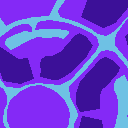

Patch Shape: (128, 128, 3)


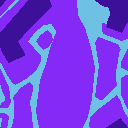

Patch Shape: (128, 128, 3)


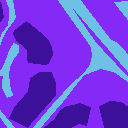

Patch Shape: (128, 128, 3)


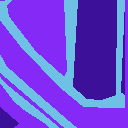

Patch Shape: (128, 128, 3)


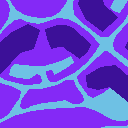

Patch Shape: (128, 128, 3)


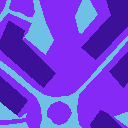

Patch Shape: (128, 128, 3)


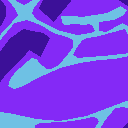

Patch Shape: (128, 128, 3)


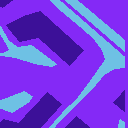

Patch Shape: (128, 128, 3)


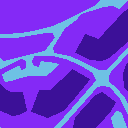

Patch Shape: (128, 128, 3)


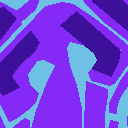

Patch Shape: (128, 128, 3)


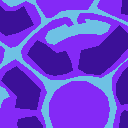

Patch Shape: (128, 128, 3)


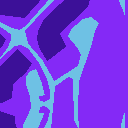

Patch Shape: (128, 128, 3)


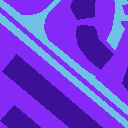

Patch Shape: (128, 128, 3)


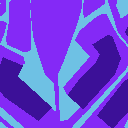

Patch Shape: (128, 128, 3)


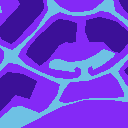

Patch Shape: (128, 128, 3)


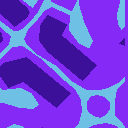

Patch Shape: (128, 128, 3)


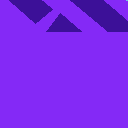

Patch Shape: (128, 128, 3)


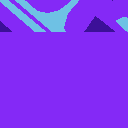

Patch Shape: (128, 128, 3)


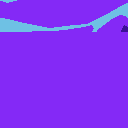

Patch Shape: (128, 128, 3)


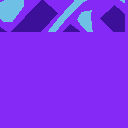

In [ ]:
## Padding technique

# Read the image (replace with your image)
image = cv2.imread(images[5], 1)
print("Original Image Shape:", image.shape)

image_patch_size = 128

# Calculate the required padding dimensions to make the image size divisible by patch size
pad_x = (image_patch_size - image.shape[1] % image_patch_size) % image_patch_size
pad_y = (image_patch_size - image.shape[0] % image_patch_size) % image_patch_size

# Pad the image (adding padding to the right and bottom to match patch size)
image_padded = cv2.copyMakeBorder(image, 0, pad_y, 0, pad_x, cv2.BORDER_CONSTANT, value=(246, 41, 132))

print("Padded Image Shape:", image_padded.shape)

# Patchify the image
image_patches = patchify(image_padded, (image_patch_size, image_patch_size, 3), step=image_patch_size)
print("Image Patches Shape:", image_patches.shape)

# Loop through the patches and display them
for i in range(image_patches.shape[0]):
    for j in range(image_patches.shape[1]):
        # Extract a single patch
        single_patch_img = image_patches[i, j, 0, :, :, :]  # Remove the extra dimension
        print("Patch Shape:", single_patch_img.shape)

        # Display the patch
        cv2_imshow(single_patch_img)

In [ ]:
image_patch_size = 256

for image in images:
  img = cv2.imread(image, 1)
  print(img.shape)

(544, 509, 3)
(544, 510, 3)
(544, 509, 3)
(544, 509, 3)
(544, 510, 3)
(544, 509, 3)
(544, 509, 3)
(544, 509, 3)
(544, 510, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(644, 797, 3)
(644, 797, 3)
(644, 797, 3)
(643, 797, 3)
(643, 797, 3)
(644, 797, 3)
(643, 797, 3)
(644, 797, 3)
(644, 797, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(2062, 1817, 3)
(2061, 1817, 3)
(2061, 1816, 3)
(2062, 1817, 3)
(2061, 1816, 3)
(2061, 1817, 3)
(2061, 1817, 3)
(2062, 1816, 3)
(2061, 1817, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(1479, 2149, 3)
(1479, 2149, 3)
(1480, 2149, 3)
(1479, 2149, 3)
(1480, 21